# Randomized Optimization
The purpose of this project is to explore random search. As always, it is important to realize that understanding an algorithm or technique requires more than reading about that algorithm or even implementing it. You must implement four local random search algorithms. They are: 
- randomized hill climbing (RHC)
- simulated annealing (SA)
- a genetic algorithm (GA)
- Mutual Information maximum Input Clustering (MIMIC)

In [0]:
# Cluster - georgia_tech
# Runtime: 10.2 ML
# Driver: Standard_DS5_v2
# Worker(s): Standard_DS5_v2
# Created by: Herbert Ssegane
# Date: 03/03/2022

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

from IPython.core.display import display, HTML
import mlrose_hiive
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, KnapsackGenerator
from mlrose_hiive import SARunner, GARunner, RHCRunner, MIMICRunner
import networkx as nx

# 8-Queens

In [0]:
# Generate a new 8-Queen problem using a fixed seed.
problem = QueensGenerator().generate(seed=42, size=8)
state = problem.get_state()


state

Out[107]: array([6, 4, 6, 2, 7, 4, 3, 4])

In [0]:
rhc = RHCRunner(problem = problem,
                experiment_name = 'queens-8-rhc',
                output_directory=None,
                seed = 42,
                iteration_list = 2**np.arange(15),
                restart_list = [5],
                max_attempts=1000,
                generate_curves=True
               )

# the two data frames will contain the results
df_run_stats_rhc, df_run_curves_rhc = rhc.run()

In [0]:
print(df_run_stats_rhc.shape, df_run_curves_rhc.shape)

(48, 8) (2116, 7)

In [0]:
# # Initial state
problem.get_state()

Out[110]: array([2, 5, 7, 0, 3, 6, 4, 1])

In [0]:
df_run_stats_rhc.tail()

Out[111]:

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
43,1024,0.0,2130,3.165051,"[2, 5, 7, 0, 3, 6, 4, 1]",5,16384,2
44,2048,0.0,2130,3.165051,"[2, 5, 7, 0, 3, 6, 4, 1]",5,16384,2
45,4096,0.0,2130,3.165051,"[2, 5, 7, 0, 3, 6, 4, 1]",5,16384,2
46,8192,0.0,2130,3.165051,"[2, 5, 7, 0, 3, 6, 4, 1]",5,16384,2
47,16384,0.0,2130,3.165051,"[2, 5, 7, 0, 3, 6, 4, 1]",5,16384,2


In [0]:
optimal_queen8 = df_run_stats_rhc[df_run_stats_rhc['Fitness']==0].drop_duplicates(subset=['State'])
optimal_queen8

Out[112]:

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
39,64,0.0,2130,3.165051,"[2, 5, 7, 0, 3, 6, 4, 1]",5,16384,2


In [0]:
# best runs
best_runs = df_run_curves_rhc[df_run_curves_rhc['Fitness'] == df_run_curves_rhc['Fitness'].min()]
best_runs

Out[11]:

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
2115,40,0.030914,0.0,2130.0,5,16384,2


In [0]:
rhc = df_run_curves_rhc[(df_run_curves_rhc['Restarts']==5) & (df_run_curves_rhc['current_restart']==2)]
rhc = rhc[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(rhc.shape)
rhc.head()

(40, 4)
Out[27]:

,Iteration,Time,Fitness,FEvals
2076,1,0.004069,9.0,2087.0
2077,2,0.007036,9.0,2088.0
2078,3,0.009604,4.0,2090.0
2079,4,0.009902,4.0,2091.0
2080,5,0.012698,3.0,2093.0


In [0]:
# create a runner class and solve the problem
sa = SARunner(problem=problem,
              experiment_name='queens-8-sa',
              output_directory=None, 
              seed=42,
              iteration_list=2 ** np.arange(15),
              max_attempts=500,
              temperature_list=[0.01, 0.10, 0.25, 0.50, 0.75, 1.00, 2.0, 3.0, 4.0, 5, 10],
              decay_list=[mlrose_hiive.ExpDecay])

# the two data frames will contain the results
df_run_stats_sa, df_run_curves_sa = sa.run()

In [0]:
print(df_run_stats_sa.shape, df_run_curves_sa.shape)

(176, 12) (5133, 6)

In [0]:
# Initial state
state.tolist()

Out[32]: [6, 4, 6, 2, 7, 4, 3, 4]

In [0]:
df_run_stats_sa[['Iteration', 'Fitness', 'FEvals', 'Time', 'State', 'Temperature', 'max_iters']].head()

Out[33]:

,Iteration,Fitness,FEvals,Time,State,Temperature,max_iters
0,0,10.0,0,0.000818,"[6, 3, 4, 6, 2, 7, 4, 4]",0.01,16384
1,1,8.0,2,0.004506,"[6, 3, 4, 6, 2, 7, 1, 4]",0.01,16384
2,2,5.0,4,0.007644,"[6, 3, 7, 6, 2, 7, 1, 4]",0.01,16384
3,4,5.0,8,0.011315,"[6, 3, 2, 2, 2, 7, 1, 4]",0.01,16384
4,8,5.0,15,0.015912,"[6, 3, 2, 0, 2, 7, 1, 4]",0.01,16384


In [0]:
optimal_queen8 = df_run_stats_sa[df_run_stats_sa['Fitness']==0][['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].drop_duplicates(subset=['State'])
optimal_queen8

Out[34]:

,Iteration,Fitness,FEvals,Time,State
9,256,0.0,169,0.084898,"[1, 4, 6, 0, 2, 7, 5, 3]"
58,512,0.0,298,0.153497,"[1, 4, 6, 3, 0, 7, 5, 2]"
75,1024,0.0,695,0.423261,"[2, 5, 1, 4, 7, 0, 6, 3]"
91,1024,0.0,643,0.368758,"[1, 6, 4, 7, 0, 3, 5, 2]"
107,1024,0.0,761,0.439747,"[4, 6, 3, 0, 2, 7, 5, 1]"
123,1024,0.0,1079,0.698591,"[3, 6, 2, 7, 1, 4, 0, 5]"
138,512,0.0,769,0.405563,"[1, 6, 2, 5, 7, 4, 0, 3]"
155,1024,0.0,878,0.498207,"[2, 6, 1, 7, 5, 3, 0, 4]"
171,1024,0.0,1289,0.803308,"[3, 6, 0, 7, 4, 1, 5, 2]"


In [0]:
best_fitness = df_run_curves_sa['Fitness'].min()
best_runs = df_run_curves_sa[df_run_curves_sa['Fitness'] == best_fitness]
best_runs

Out[37]:

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
146,146,0.084898,0.0,169.0,0.01,16384
293,146,0.084898,0.0,169.0,0.1,16384
440,146,0.084898,0.0,169.0,0.25,16384
704,263,0.068985,0.0,298.0,0.5,16384
1311,606,0.098887,0.0,695.0,0.75,16384
1829,517,0.058621,0.0,643.0,1.0,16384
2406,576,0.085860,0.0,761.0,2.0,16384
3223,816,0.079277,0.0,1079.0,3.0,16384
3719,495,0.046678,0.0,769.0,4.0,16384
4287,567,0.078440,0.0,878.0,5,16384


In [0]:
'''
Impact of the decay function
1. Arithmetic Decay:  ArithDecay
2. Exponential Decay: ExpDecay
3. Geometric Decay:   GeomDecay

'''
print('')

In [0]:
# # create a runner class and solve the problem
# #***************** Arithmetic Decay ************
# sa = SARunner(problem=problem,
#               experiment_name='queens-8-sa',
#               output_directory=None, 
#               seed=42,
#               iteration_list=2 ** np.arange(15),
#               max_attempts=500,
#               temperature_list=[0.01, 0.10, 0.25, 0.50, 0.75, 1.00, 2.0, 3.0, 4.0, 5, 10],
#               decay_list=[mlrose_hiive.ArithDecay])

# # run the optimization algorithm
# df_run_stats, df_run_curves = sa.run()

# # Best runs
# best_fitness = df_run_curves['Fitness'].min()
# best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
# best_runs

In [0]:
'''
Geometric Decay & Exponential Decay gave same results

'''

# # create a runner class and solve the problem
# #***************** Geometric Decay ************
# sa = SARunner(problem=problem,
#               experiment_name='queens-8-sa',
#               output_directory=None, 
#               seed=42,
#               iteration_list=2 ** np.arange(15),
#               max_attempts=500,
#               temperature_list=[0.01, 0.10, 0.25, 0.50, 0.75, 1.00, 2.0, 3.0, 4.0, 5, 10],
#               decay_list=[mlrose_hiive.GeomDecay])

# # run the optimization
# df_run_stats, df_run_curves = sa.run()

# # Best runs
# best_fitness = df_run_curves['Fitness'].min()
# best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
# best_runs

Out[18]: '\nGeometric Decay & Exponential Decay gave same results\n\n'

In [0]:
df_run_curves_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133 entries, 0 to 5132
Data columns (total 6 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Iteration 5133 non-null int64 
 1 Time 5133 non-null float64
 2 Fitness 5133 non-null float64
 3 FEvals 5133 non-null float64
 4 Temperature 5133 non-null object 
 5 max_iters 5133 non-null int64 
dtypes: float64(3), int64(2), object(1)
memory usage: 240.7+ KB

In [0]:
df_run_curves_sa['Temperature'] = df_run_curves_sa['Temperature'].apply(lambda x: float(str(x)))

In [0]:
sac = df_run_curves_sa[(df_run_curves_sa['Temperature'] == 0.01)]
sac = sac[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(sac.shape)
sac.head()

(147, 4)
Out[47]:

,Iteration,Time,Fitness,FEvals
0,0,0.000818,10.0,0.0
1,1,0.004506,8.0,2.0
2,2,0.007644,5.0,4.0
3,3,0.010764,5.0,6.0
4,4,0.011315,5.0,8.0


In [0]:
# create a runner class and solve the problem
#***************** Arithmetic Decay ************
ga = GARunner(problem=problem,
              experiment_name='queens-8-ga',
              output_directory=None, 
              seed=42,
              iteration_list=2 ** np.arange(15),
              population_sizes=[10, 20, 50, 100],
              mutation_rates=[0.01, 0.05, 0.1, 0.2, 0.5])

# run the optimization algorithm
df_run_stats_ga, df_run_curves_ga = ga.run()

In [0]:
# optimal solutions
optimal_queen8 = df_run_stats_ga[df_run_stats_ga['Fitness']==0].drop_duplicates(subset=['State'])
optimal_queen8

Out[49]:

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
69,16,0.0,192,0.105291,"[6, 1, 3, 0, 7, 4, 2, 5]",10,0.50,16384
153,256,0.0,3110,1.199190,"[7, 1, 4, 2, 0, 6, 3, 5]",20,0.50,16384
216,128,0.0,5816,1.792388,"[1, 5, 7, 2, 0, 3, 6, 4]",50,0.20,16384
230,32,0.0,1176,0.425357,"[2, 5, 3, 1, 7, 4, 6, 0]",50,0.50,16384
248,128,0.0,11112,3.585048,"[1, 4, 6, 3, 0, 7, 5, 2]",100,0.01,16384
261,16,0.0,1518,0.543702,"[4, 6, 0, 3, 1, 7, 5, 2]",100,0.05,16384
281,256,0.0,16769,7.211258,"[3, 5, 7, 2, 0, 6, 4, 1]",100,0.10,16384
310,32,0.0,2124,0.706517,"[3, 0, 4, 7, 5, 2, 6, 1]",100,0.50,16384


In [0]:
# Best runs
best_fitness = df_run_curves_ga['Fitness'].min()
best_runs = df_run_curves_ga[df_run_curves_ga['Fitness'] == best_fitness]
best_runs

Out[50]:

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
3138,16,0.067273,0.0,192.0,10,0.50,16384
5472,147,0.502426,0.0,3110.0,20,0.50,16384
7109,113,0.385531,0.0,5816.0,50,0.20,16384
7132,22,0.089068,0.0,1176.0,50,0.50,16384
7242,109,0.372505,0.0,11112.0,100,0.01,16384
7257,14,0.060770,0.0,1518.0,100,0.05,16384
7423,165,0.563160,0.0,16769.0,100,0.10,16384
7962,20,0.082637,0.0,2124.0,100,0.50,16384


In [0]:
gac = df_run_curves_ga[(df_run_curves_ga['Population Size'] == 100) & ((df_run_curves_ga['Mutation Rate'] == 0.05))]
gac = gac[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(gac.shape)
gac.head()

(15, 4)
Out[51]:

,Iteration,Time,Fitness,FEvals
7243,0,0.003229,10.0,100.0
7244,1,0.009334,3.0,202.0
7245,2,0.014871,3.0,303.0
7246,3,0.020380,3.0,404.0
7247,4,0.023597,3.0,505.0


In [0]:
# fitness = mlrose_hiive.Queens()
# problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
# max_attempts = 100
# max_iters = 100

mimic = MIMICRunner(problem = problem,
                    experiment_name = 'queens-8-mimic',
                    output_directory = None,
                    seed = 42,
                    iteration_list = 2 ** np.arange(15),
                    population_sizes = [10, 20, 50, 100, 500],
                    keep_percent_list = [0.01, 0.05, 0.1, 0.2, 0.5],
                    max_attempts=500,
                    generate_curves=True,
                    use_fast_mimic=False)

# run the optimization algorithm
df_run_stats_mimic, df_run_curves_mimic = mimic.run()

In [0]:
# optimal solutions
optimal_queen8 = df_run_stats_mimic[df_run_stats_mimic['Fitness']==df_run_stats_mimic['Fitness'].min()].drop_duplicates(subset=['State'])
optimal_queen8

Out[4]:

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
311,64,0.0,4043,2.302994,"[3.0, 5.0, 7.0, 2.0, 0.0, 6.0, 4.0, 1.0]",False,100,0.5,16384
355,4,0.0,2507,0.805769,"[5.0, 3.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0]",False,500,0.1,16384
387,4,0.0,2506,0.835806,"[5.0, 2.0, 6.0, 3.0, 0.0, 7.0, 1.0, 4.0]",False,500,0.5,16384


In [0]:
# Best runs
best_fitness = df_run_curves_mimic['Fitness'].min()
best_runs = df_run_curves_mimic[df_run_curves_mimic['Fitness'] == best_fitness]
best_runs

Out[5]:

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
9582,39,1.435068,0.0,4043.0,False,100,0.5,16384
10591,4,0.166637,0.0,2507.0,False,500,0.1,16384
10598,6,0.243026,0.0,3509.0,False,500,0.2,16384
10603,4,0.166637,0.0,2506.0,False,500,0.5,16384


In [0]:
mmc = df_run_curves_mimic[(df_run_curves_mimic['Population Size'] == 500) & ((df_run_curves_mimic['Keep Percent'] == 0.1))]
mmc = mmc[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(mmc.shape)
mmc.head()

(5, 4)
Out[52]:

,Iteration,Time,Fitness,FEvals
10587,0,0.003215,10.0,500.0
10588,1,0.052989,2.0,1002.0
10589,2,0.091908,1.0,1504.0
10590,3,0.129050,1.0,2005.0
10591,4,0.166637,0.0,2507.0


In [0]:
# combine dataframes
comb_df = sac.merge(rhc, how='left', on='Iteration')
comb_df = comb_df.merge(gac, how='left', on='Iteration')
comb_df = comb_df.merge(mmc, how='left', on='Iteration')
comb_df.columns = ['Iteration', 'TimeSA', 'FitnessSA', 'FEvalsSA', 'TimeRHC', 'FitnessRHC', 'FEvalsRHC', 'TimeGA', 'FitnessGA', 'FEvalsGA', 'TimeMIMIC', 'FitnessMIMIC', 'FEvalsMIMIC']

print(comb_df.shape)
comb_df.head()

(147, 13)
Out[57]:

,Iteration,TimeSA,FitnessSA,FEvalsSA,TimeRHC,FitnessRHC,FEvalsRHC,TimeGA,FitnessGA,FEvalsGA,TimeMIMIC,FitnessMIMIC,FEvalsMIMIC
0,0,0.000818,10.0,0.0,NaN,NaN,NaN,0.003229,10.0,100.0,0.003215,10.0,500.0
1,1,0.004506,8.0,2.0,0.004069,9.0,2087.0,0.009334,3.0,202.0,0.052989,2.0,1002.0
2,2,0.007644,5.0,4.0,0.007036,9.0,2088.0,0.014871,3.0,303.0,0.091908,1.0,1504.0
3,3,0.010764,5.0,6.0,0.009604,4.0,2090.0,0.020380,3.0,404.0,0.129050,1.0,2005.0
4,4,0.011315,5.0,8.0,0.009902,4.0,2091.0,0.023597,3.0,505.0,0.166637,0.0,2507.0


In [0]:
fitness_df = comb_df[['Iteration', 'FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']]
fitness_df.loc[0, ['FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']] = 10
fitness_df[['FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']] = fitness_df[['FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']].fillna(0)

fitness_df.head()

Out[65]:

,Iteration,FitnessSA,FitnessRHC,FitnessGA,FitnessMIMIC
0,0,10.0,10.0,10.0,10.0
1,1,8.0,9.0,3.0,2.0
2,2,5.0,9.0,3.0,1.0
3,3,5.0,4.0,3.0,1.0
4,4,5.0,4.0,3.0,0.0


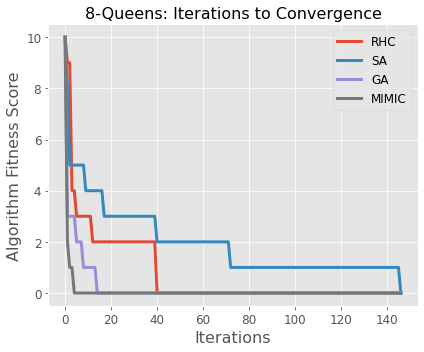

In [0]:
fig = plt.figure(figsize=(6, 5))
plt.style.use('ggplot')

# Train curve
plt.title("8-Queens: Iterations to Convergence", size = 16 )
plt.xlabel(r"Iterations", size = 16)
plt.ylabel("Algorithm Fitness Score", size = 16)
# plt.ylim(0.65, 1.02)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessRHC'], label="RHC", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessSA'], label="SA", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessGA'], label="GA", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessMIMIC'], label="MIMIC", lw=3)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

Out[85]:

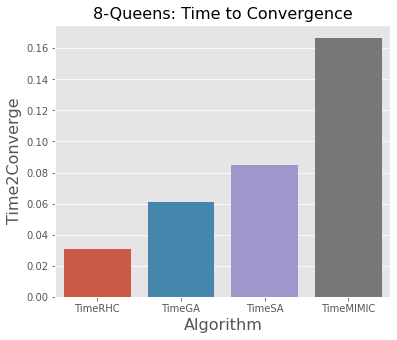

<AxesSubplot:title={'center':'8-Queens: Time to Convergence'}, xlabel='Algorithm', ylabel='Time2Converge'>

In [0]:
time_df = comb_df[['TimeSA', 'TimeRHC', 'TimeGA', 'TimeMIMIC']]
tmax = pd.DataFrame(time_df.max().sort_values()).reset_index()
tmax.columns = ['Algorithm', 'Time2Converge']
tmax

fig = plt.figure(figsize=(6, 5))
plt.title("8-Queens: Time to Convergence", size = 16 )
plt.xlabel(r"Algorithm", size = 16)
plt.ylabel("Time to Converge", size = 16)
sns.barplot(tmax['Algorithm'], tmax['Time2Converge'])


# # Train curve

# # plt.ylim(0.65, 1.02)
# plt.xticks(size = 12)
# plt.yticks(size = 12)
# plt.plot(time_df['Iteration'], time_df['TimeRHC'], label="RHC", lw=3)
# plt.plot(time_df['Iteration'], time_df['TimeSA'], label="SA", lw=3)
# plt.plot(time_df['Iteration'], time_df['TimeGA'], label="GA", lw=3)
# plt.plot(time_df['Iteration'], time_df['TimeMIMIC'], label="MIMIC", lw=3)

# plt.legend(loc='best', fontsize=12)
# plt.tight_layout()

# Knapsack Problem

In [0]:

weights=[7, 0.5, 30, 22, 80, 94, 11, 81, 70, 64,
         59, 18, 0.5, 36, 3, 8, 15, 42, 9, 0.5,
         42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2,
         4, 18, 56, 7, 29, 93, 44, 71, 3, 86, 66,
         31, 65, 0.5, 79, 20, 65, 52, 13] # (lbs)

values=[360, 83, 59, 130, 431, 67, 230, 52, 93, 125,
        670, 892, 600, 38, 48, 147, 78, 256, 63, 17,
        120, 164, 432, 35, 92, 110, 22, 42, 50, 323,
        514, 28, 87, 73, 78, 15, 26, 78, 210, 36, 85,
        189, 274, 43, 33, 10, 19, 389, 276, 312] #($)

# max weight as a percent
max_weight = 0.45 # about 843 lbs

# Define fitness
fitness = mlrose_hiive.Knapsack(weights=weights,
                               values=values,
                               max_weight_pct=max_weight)
# Define problem
problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True, max_val=2)

In [0]:
rhc = RHCRunner(problem = problem,
                experiment_name = None,
                output_directory=None,
                seed = 42,
                iteration_list = 2**np.arange(15),
                restart_list = [20],
                max_attempts=1000,
                generate_curves=True
               )

# the two data frames will contain the results
df_run_stats_rhc, df_run_curves_rhc = rhc.run()

In [0]:
df_run_stats_rhc.head()

Out[4]:

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,0.0,0,0.000212,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",20,16384,0
1,1,0.0,1,0.004541,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",20,16384,0
2,2,0.0,2,0.007004,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",20,16384,0
3,4,0.0,4,0.009548,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",20,16384,0
4,8,0.0,8,0.012188,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",20,16384,0


In [0]:
df_run_stats_rhc.tail()

Out[5]:

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
331,1024,0.0,21611,244.281611,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...",20,16384,20
332,2048,0.0,21611,244.281611,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...",20,16384,20
333,4096,0.0,21611,244.281611,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...",20,16384,20
334,8192,0.0,21611,244.281611,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...",20,16384,20
335,16384,0.0,21611,244.281611,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...",20,16384,20


In [0]:
optimal_queen8 = df_run_stats_rhc[df_run_stats_rhc['Fitness']==df_run_stats_rhc['Fitness'].max()].drop_duplicates(subset=['State'])
optimal_queen8

Out[6]:

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
88,128,5972.0,5236,14.064167,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...",20,16384,5


In [0]:
# Best runs
best_fitness = df_run_curves_rhc['Fitness'].max()
best_runs = df_run_curves_rhc[df_run_curves_rhc['Fitness'] == best_fitness]
best_runs.head()


Out[7]:

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
5169,77,0.027783,5972.0,5185.0,20,16384,5
5170,78,0.027918,5972.0,5186.0,20,16384,5
5171,79,0.028084,5972.0,5187.0,20,16384,5
5172,80,0.028213,5972.0,5188.0,20,16384,5
5173,81,0.028344,5972.0,5189.0,20,16384,5


In [0]:
rhc = df_run_curves_rhc[(df_run_curves_rhc['current_restart'] == 5)]
rhc = rhc[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(rhc.shape)
rhc.head()

(1077, 4)
Out[8]:

,Iteration,Time,Fitness,FEvals
5093,1,0.004541,2810.0,5099.0
5094,2,0.007004,3084.0,5101.0
5095,3,0.009476,3167.0,5103.0
5096,4,0.009548,3292.0,5105.0
5097,5,0.011993,3292.0,5106.0


In [0]:
rhc[rhc['Iteration']==77]

Out[9]:

,Iteration,Time,Fitness,FEvals
5169,77,0.027783,5972.0,5185.0


In [0]:
# create a runner class and solve the problem
sa = SARunner(problem=problem,
              experiment_name=None,
              output_directory=None, 
              seed=42,
              iteration_list=2 ** np.arange(15),
              max_attempts=1000,
              temperature_list=[0.10, 1.0,  5, 10, 100, 500, 1000, 5000, 10000, 100000],
              decay_list=[mlrose_hiive.ExpDecay])

# the two data frames will contain the results
df_run_stats_sa, df_run_curves_sa = sa.run()

In [0]:
optimal_queen8 = df_run_stats_sa[df_run_stats_sa['Fitness']==df_run_stats_sa['Fitness'].max()][['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].drop_duplicates(subset=['State'])
optimal_queen8

Out[11]:

,Iteration,Fitness,FEvals,Time,State
124,2048,7118.0,2676,2.474414,"[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, ..."


In [0]:
df_run_curves_sa['Temperature'] = df_run_curves_sa['Temperature'].apply(lambda x: float(str(x)))

best_fitness = df_run_curves_sa['Fitness'].max()
best_runs = df_run_curves_sa[df_run_curves_sa['Fitness'] == best_fitness].drop_duplicates(subset='Temperature')
best_runs

Out[12]:

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
10774,1263,0.064695,7118.0,1891.0,5000.0,16384


In [0]:
sac = df_run_curves_sa[(df_run_curves_sa['Temperature'] == 5000)]
sac = sac[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(sac.shape)
sac.head()

(2264, 4)
Out[13]:

,Iteration,Time,Fitness,FEvals
9511,0,0.000178,0.0,0.0
9512,1,0.002997,0.0,2.0
9513,2,0.005761,0.0,4.0
9514,3,0.008379,0.0,6.0
9515,4,0.008487,0.0,8.0


In [0]:
# create a runner class and solve the problem
#***************** Arithmetic Decay ************
ga = GARunner(problem=problem,
              experiment_name='queens-8-ga',
              output_directory=None, 
              seed=42,
              iteration_list=2 ** np.arange(15),
              population_sizes=[50, 100, 500, 1000],
              mutation_rates=[0.1, 0.2, 0.5])

# run the optimization algorithm
df_run_stats_ga, df_run_curves_ga = ga.run()

In [0]:
# optimal solutions
optimal_queen8 = df_run_stats_ga[df_run_stats_ga['Fitness']==df_run_stats_ga['Fitness'].max()].drop_duplicates(subset=['State'])
optimal_queen8

Out[15]:

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
9,256,7512.0,13128,1.223293,"[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, ...",50,0.1,16384


In [0]:
# Best runs
best_fitness = df_run_curves_ga['Fitness'].max()
best_runs = df_run_curves_ga[df_run_curves_ga['Fitness'] == best_fitness].drop_duplicates(subset=['Population Size', 'Mutation Rate'])
best_runs

Out[16]:

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
187,187,0.904126,7512.0,9609.0,50,0.1,16384
2509,51,0.260627,7512.0,5270.0,100,0.2,16384
3729,719,0.162891,7512.0,72736.0,100,0.5,16384
4268,38,0.195156,7512.0,19555.0,500,0.1,16384
4798,29,0.149198,7512.0,15045.0,500,0.2,16384
5449,150,0.729620,7512.0,75670.0,500,0.5,16384
5982,32,0.162739,7512.0,33050.0,1000,0.1,16384
6518,35,0.181695,7512.0,36055.0,1000,0.2,16384
7058,39,0.199752,7512.0,40057.0,1000,0.5,16384


In [0]:
# df_run_curves_ga['Population Size'] = df_run_curves_ga['Population Size'].apply(lambda x: float(str(x)))
# df_run_curves_ga['Mutation Rate'] = df_run_curves_ga['Mutation Rate'].apply(lambda x: float(str(x)))

gac = df_run_curves_ga[(df_run_curves_ga['Population Size'] == 100) & ((df_run_curves_ga['Mutation Rate'] == 0.2))]
gac = gac[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(gac.shape)
gac.head()

(552, 4)
Out[17]:

,Iteration,Time,Fitness,FEvals
2458,0,0.002048,0.0,100.0
2459,1,0.009181,5931.0,202.0
2460,2,0.016032,6054.0,304.0
2461,3,0.022837,6054.0,405.0
2462,4,0.027398,6054.0,506.0


In [0]:
mimic = MIMICRunner(problem = problem,
                    experiment_name = 'queens-8-mimic',
                    output_directory = None,
                    seed = 42,
                    iteration_list = 2 ** np.arange(15),
                    population_sizes = [500],
                    keep_percent_list = [0.5],
                    max_attempts=500,
                    generate_curves=True,
                    use_fast_mimic=False)

# run the optimization algorithm
df_run_stats_mimic, df_run_curves_mimic = mimic.run()

In [0]:
# Best runs
best_fitness = df_run_curves_mimic['Fitness'].max()
best_runs = df_run_curves_mimic[df_run_curves_mimic['Fitness'] == best_fitness]
best_runs

Out[20]:

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
33,33,44.175914,6200.0,17036.0,False,500,0.5,16384
34,34,45.483385,6200.0,17537.0,False,500,0.5,16384
35,35,46.789425,6200.0,18038.0,False,500,0.5,16384
36,36,48.092720,6200.0,18539.0,False,500,0.5,16384
37,37,49.393238,6200.0,19040.0,False,500,0.5,16384
...,...,...,...,...,...,...,...,...
529,529,687.101345,6200.0,265532.0,False,500,0.5,16384
530,530,688.362999,6200.0,266033.0,False,500,0.5,16384
531,531,689.620353,6200.0,266534.0,False,500,0.5,16384
532,532,690.892304,6200.0,267035.0,False,500,0.5,16384


In [0]:
mmc = df_run_curves_mimic[(df_run_curves_mimic['Population Size'] == 500) & ((df_run_curves_mimic['Keep Percent'] == 0.5))]
mmc = mmc[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(mmc.shape)
mmc.head()

(534, 4)
Out[21]:

,Iteration,Time,Fitness,FEvals
0,0,0.020781,0.0,500.0
1,1,1.236067,5778.0,1002.0
2,2,2.526524,5778.0,1503.0
3,3,3.821580,5778.0,2004.0
4,4,5.126549,6199.0,2506.0


In [0]:
# combine dataframes
comb_df = sac.merge(rhc, how='left', on='Iteration')
comb_df = comb_df.merge(gac, how='left', on='Iteration')
comb_df = comb_df.merge(mmc, how='left', on='Iteration')
comb_df.columns = ['Iteration', 'TimeSA', 'FitnessSA', 'FEvalsSA', 'TimeRHC', 'FitnessRHC', 'FEvalsRHC', 'TimeGA', 'FitnessGA', 'FEvalsGA', 'TimeMIMIC', 'FitnessMIMIC', 'FEvalsMIMIC']

print(comb_df.shape)
comb_df.head()

(2264, 13)
Out[22]:

,Iteration,TimeSA,FitnessSA,FEvalsSA,TimeRHC,FitnessRHC,FEvalsRHC,TimeGA,FitnessGA,FEvalsGA,TimeMIMIC,FitnessMIMIC,FEvalsMIMIC
0,0,0.000178,0.0,0.0,NaN,NaN,NaN,0.002048,0.0,100.0,0.020781,0.0,500.0
1,1,0.002997,0.0,2.0,0.004541,2810.0,5099.0,0.009181,5931.0,202.0,1.236067,5778.0,1002.0
2,2,0.005761,0.0,4.0,0.007004,3084.0,5101.0,0.016032,6054.0,304.0,2.526524,5778.0,1503.0
3,3,0.008379,0.0,6.0,0.009476,3167.0,5103.0,0.022837,6054.0,405.0,3.821580,5778.0,2004.0
4,4,0.008487,0.0,8.0,0.009548,3292.0,5105.0,0.027398,6054.0,506.0,5.126549,6199.0,2506.0


In [0]:
fitness_df = comb_df[['Iteration', 'FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']]
fitness_df.loc[0, ['FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']] = 0
fitness_df['FitnessRHC'] = fitness_df['FitnessRHC'].fillna(fitness_df['FitnessRHC'].max())
fitness_df['FitnessSA'] = fitness_df['FitnessSA'].fillna(fitness_df['FitnessSA'].max())
fitness_df['FitnessGA'] = fitness_df['FitnessGA'].fillna(fitness_df['FitnessGA'].max())
fitness_df['FitnessMIMIC'] = fitness_df['FitnessMIMIC'].fillna(fitness_df['FitnessMIMIC'].max())

fitness_df.head()

Out[23]:

,Iteration,FitnessSA,FitnessRHC,FitnessGA,FitnessMIMIC
0,0,0.0,0.0,0.0,0.0
1,1,0.0,2810.0,5931.0,5778.0
2,2,0.0,3084.0,6054.0,5778.0
3,3,0.0,3167.0,6054.0,5778.0
4,4,0.0,3292.0,6054.0,6199.0


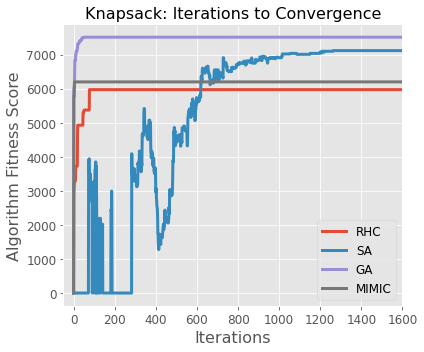

In [0]:
fig = plt.figure(figsize=(6, 5))
plt.style.use('ggplot')

# Train curve
plt.title("Knapsack: Iterations to Convergence", size = 16 )
plt.xlabel(r"Iterations", size = 16)
plt.ylabel("Algorithm Fitness Score", size = 16)
plt.xlim(-50, 1600)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessRHC'], label="RHC", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessSA'], label="SA", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessGA'], label="GA", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessMIMIC'], label="MIMIC", lw=3)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

Algorithm Time2Converge
0 TimeRHC 0.680636
1 TimeSA 0.757758
2 TimeGA 2.636741
3 TimeMIMIC 692.152116
Out[36]:

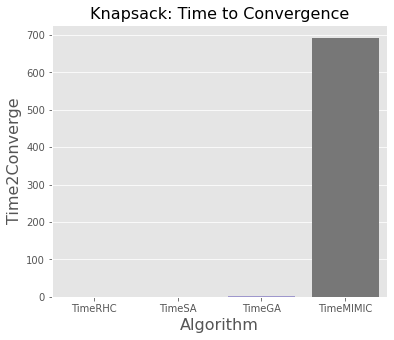

<AxesSubplot:title={'center':'Knapsack: Time to Convergence'}, xlabel='Algorithm', ylabel='Time2Converge'>

In [0]:
time_df = comb_df[['TimeSA', 'TimeRHC', 'TimeGA', 'TimeMIMIC']]
tmax = pd.DataFrame(time_df.max().sort_values()).reset_index()
tmax.columns = ['Algorithm', 'Time2Converge']
print(tmax)

fig = plt.figure(figsize=(6, 5))
plt.title("Knapsack: Time to Convergence", size = 16 )
plt.xlabel(r"Algorithm", size = 16)
plt.ylabel("Time to Converge", size = 16)
sns.barplot(tmax['Algorithm'], tmax['Time2Converge'])

# Traveling Salesman Problem (TSP)

In [0]:
# Generate a new TSP problem using a fixed seed.
problem = TSPGenerator().generate(seed=42, number_of_cities=10)

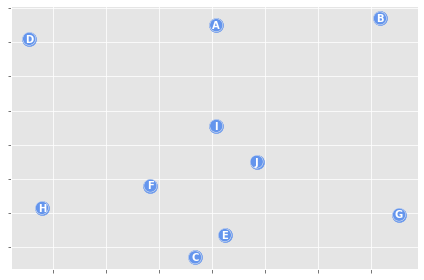

In [0]:
import string

fig, ax = plt.subplots(1)         # Prepare 2 plots
ax.set_yticklabels([])
ax.set_xticklabels([])
for i, (x,y) in enumerate(problem.coords):
    ax.scatter(x,y, s=200, c='cornflowerblue')             # plot A
node_labels = {k:str(v) for k, v in enumerate(string.ascii_uppercase) if k < len(problem.source_graph.nodes)}
for i in node_labels.keys():
    x,y = problem.coords[i]
    plt.text(x, y, node_labels[i], ha="center", va="center", c='white', fontweight='bold',
             bbox = dict(boxstyle=f"circle,pad=0.15", fc='cornflowerblue'))

plt.tight_layout()
plt.show()

In [0]:
rhc = RHCRunner(problem = problem,
                experiment_name = None,
                output_directory=None,
                seed = 42,
                iteration_list = 2**np.arange(15),
                restart_list = [20],
                max_attempts=1000,
                generate_curves=True
               )

# the two data frames will contain the results
df_run_stats_rhc, df_run_curves_rhc = rhc.run()

In [0]:
optimal_queen8 = df_run_stats_rhc[df_run_stats_rhc['Fitness']==df_run_stats_rhc['Fitness'].min()].drop_duplicates(subset=['State'])
optimal_queen8

Out[41]:

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
8,128,664.96179,139,0.049686,"[1, 0, 3, 7, 5, 2, 4, 8, 9, 6]",20,16384,0
40,128,664.96179,2308,3.046315,"[2, 5, 7, 3, 0, 1, 6, 9, 8, 4]",20,16384,2
152,128,664.96179,10042,53.481643,"[8, 9, 6, 1, 0, 3, 7, 5, 2, 4]",20,16384,9
169,256,664.96179,11280,66.949958,"[7, 3, 0, 1, 6, 9, 8, 4, 2, 5]",20,16384,10
199,64,664.96179,13377,93.236849,"[2, 4, 8, 9, 6, 1, 0, 3, 7, 5]",20,16384,12
328,128,664.96179,22243,256.084155,"[9, 6, 1, 0, 3, 7, 5, 2, 4, 8]",20,16384,20


In [0]:
# Best runs
best_fitness = df_run_curves_rhc['Fitness'].min()
best_runs = df_run_curves_rhc[df_run_curves_rhc['Fitness'] == best_fitness]
best_runs.head()

Out[40]:

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
116,116,0.047045,664.96179,127.0,20,16384,0
117,117,0.047259,664.96179,128.0,20,16384,0
118,118,0.047472,664.96179,129.0,20,16384,0
119,119,0.047687,664.96179,130.0,20,16384,0
120,120,0.047902,664.96179,131.0,20,16384,0


In [0]:
rhc = df_run_curves_rhc[(df_run_curves_rhc['current_restart'] == 12)]
rhc = rhc[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(rhc.shape)
rhc.head()

(1038, 4)
Out[42]:

,Iteration,Time,Fitness,FEvals
13202,1,0.005178,1052.559300,13308.0
13203,2,0.009032,1015.045517,13310.0
13204,3,0.011652,1015.045517,13311.0
13205,4,0.011761,1015.045517,13312.0
13206,5,0.014213,927.588074,13314.0


In [0]:
# create a runner class and solve the problem
sa = SARunner(problem=problem,
              experiment_name=None,
              output_directory=None, 
              seed=42,
              iteration_list=2 ** np.arange(15),
              max_attempts=1000,
              temperature_list=[0.10, 1.0,  10, 100, 500, 1000, 5000, 10000, 100000],
              decay_list=[mlrose_hiive.ExpDecay])

# the two data frames will contain the results
df_run_stats_sa, df_run_curves_sa = sa.run()

In [0]:
optimal_queen8 = df_run_stats_sa[df_run_stats_sa['Fitness']==df_run_stats_sa['Fitness'].min()][['Iteration', 'Fitness', 'FEvals', 'Time', 'State']].drop_duplicates(subset=['State'])
optimal_queen8

Out[44]:

,Iteration,Fitness,FEvals,Time,State
8,128,664.96179,135,0.045975,"[9, 6, 1, 0, 3, 7, 5, 2, 4, 8]"
75,1024,664.96179,1468,0.853188,"[8, 4, 2, 5, 7, 3, 0, 1, 6, 9]"
141,4096,664.96179,4793,6.300918,"[4, 8, 9, 6, 1, 0, 3, 7, 5, 2]"


In [0]:
df_run_curves_sa['Temperature'] = df_run_curves_sa['Temperature'].apply(lambda x: float(str(x)))

best_fitness = df_run_curves_sa['Fitness'].min()
best_runs = df_run_curves_sa[df_run_curves_sa['Fitness'] == best_fitness].drop_duplicates(subset='Temperature')
best_runs

Out[45]:

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
107,107,0.041535,664.96179,114.0,0.1,16384
1215,107,0.041535,664.96179,114.0,1.0,16384
2323,107,0.041535,664.96179,114.0,10.0,16384
3967,354,0.134628,664.96179,491.0,100.0,16384
6202,978,0.660936,664.96179,1422.0,500.0,16384
7911,708,0.391184,664.96179,1223.0,1000.0,16384
10566,1161,0.036241,664.96179,2042.0,5000.0,16384
16256,1848,0.430954,664.96179,3339.0,100000.0,16384


In [0]:
sac = df_run_curves_sa[(df_run_curves_sa['Temperature'] == 0.1)]
sac = sac[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(sac.shape)
sac.head()

(1108, 4)
Out[46]:

,Iteration,Time,Fitness,FEvals
0,0,0.000402,1115.307815,0.0
1,1,0.005333,1031.079851,2.0
2,2,0.008232,1031.079851,3.0
3,3,0.010913,971.736948,5.0
4,4,0.011050,971.736948,6.0


In [0]:
# create a runner class and solve the problem
#***************** Arithmetic Decay ************
ga = GARunner(problem=problem,
              experiment_name='queens-8-ga',
              output_directory=None, 
              seed=42,
              iteration_list=2 ** np.arange(15),
              population_sizes=[50, 100, 500, 1000],
              mutation_rates=[0.1, 0.2, 0.5])

# run the optimization algorithm
df_run_stats_ga, df_run_curves_ga = ga.run()

In [0]:
# optimal solutions
optimal_queen8 = df_run_stats_ga[df_run_stats_ga['Fitness']==df_run_stats_ga['Fitness'].min()].drop_duplicates(subset=['State'])
optimal_queen8

Out[48]:

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
6,32,664.96179,1689,0.231174,"[1, 0, 3, 7, 5, 2, 4, 8, 9, 6]",50,0.1,16384
22,32,664.96179,1688,0.242176,"[4, 2, 5, 7, 3, 0, 1, 6, 9, 8]",50,0.2,16384
38,32,664.96179,1687,0.250389,"[9, 6, 1, 0, 3, 7, 5, 2, 4, 8]",50,0.5,16384
54,32,664.96179,3340,0.474392,"[8, 4, 2, 5, 7, 3, 0, 1, 6, 9]",100,0.1,16384
70,32,664.96179,3339,0.479614,"[0, 3, 7, 5, 2, 4, 8, 9, 6, 1]",100,0.2,16384
86,32,664.96179,3341,0.496252,"[7, 5, 2, 4, 8, 9, 6, 1, 0, 3]",100,0.5,16384
101,16,664.96179,8522,1.235297,"[8, 9, 6, 1, 0, 3, 7, 5, 2, 4]",500,0.1,16384
116,8,664.96179,4512,0.635560,"[3, 7, 5, 2, 4, 8, 9, 6, 1, 0]",500,0.2,16384


In [0]:
# Best runs
best_fitness = df_run_curves_ga['Fitness'].min()
best_runs = df_run_curves_ga[df_run_curves_ga['Fitness'] == best_fitness].drop_duplicates(subset=['Population Size', 'Mutation Rate'])
best_runs

Out[49]:

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
21,21,0.158413,664.96179,1128.0,50,0.1,16384
552,30,0.218389,664.96179,1586.0,50,0.2,16384
1075,22,0.165157,664.96179,1177.0,50,0.5,16384
1600,24,0.178700,664.96179,2532.0,100,0.1,16384
2129,28,0.205310,664.96179,2935.0,100,0.2,16384
2652,22,0.165157,664.96179,2331.0,100,0.5,16384
3166,13,0.103762,664.96179,7019.0,500,0.1,16384
3672,5,0.048637,664.96179,3009.0,500,0.2,16384
4176,3,0.032868,664.96179,2006.0,500,0.5,16384
4681,4,0.039632,664.96179,5008.0,1000,0.1,16384


In [0]:
gac = df_run_curves_ga[(df_run_curves_ga['Population Size'] == 50) & ((df_run_curves_ga['Mutation Rate'] == 0.1))]
gac = gac[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(gac.shape)
gac.head()

(522, 4)
Out[50]:

,Iteration,Time,Fitness,FEvals
0,0,0.002846,1115.307815,50.0
1,1,0.014896,780.556964,102.0
2,2,0.023935,780.556964,153.0
3,3,0.032868,767.483957,205.0
4,4,0.039632,755.113867,257.0


In [0]:
mimic = MIMICRunner(problem = problem,
                    experiment_name = 'queens-8-mimic',
                    output_directory = None,
                    seed = 42,
                    iteration_list = 2 ** np.arange(15),
                    population_sizes = [1000],
                    keep_percent_list = [0.5],
                    max_attempts=500,
                    generate_curves=True,
                    use_fast_mimic=False)

# run the optimization algorithm
df_run_stats_mimic, df_run_curves_mimic = mimic.run()

In [0]:
# optimal solutions
optimal_queen8 = df_run_stats_mimic[df_run_stats_mimic['Fitness']==df_run_stats_mimic['Fitness'].min()].drop_duplicates(subset=['State'])
optimal_queen8

Out[61]:

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
4,8,664.96179,9013,5.353437,"[0, 3, 7, 5, 2, 4, 8, 9, 6, 1]",False,1000,0.5,16384


In [0]:
# Best runs
best_fitness = df_run_curves_mimic['Fitness'].min()
best_runs = df_run_curves_mimic[df_run_curves_mimic['Fitness'] == best_fitness]
best_runs

Out[62]:

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
6,6,4.017835,664.96179,7011.0,False,1000,0.5,16384
7,7,4.689162,664.96179,8012.0,False,1000,0.5,16384
8,8,5.353437,664.96179,9013.0,False,1000,0.5,16384
9,9,6.007502,664.96179,10014.0,False,1000,0.5,16384
10,10,6.640681,664.96179,11015.0,False,1000,0.5,16384
...,...,...,...,...,...,...,...,...
502,502,319.470283,664.96179,503507.0,False,1000,0.5,16384
503,503,320.084161,664.96179,504508.0,False,1000,0.5,16384
504,504,320.709678,664.96179,505509.0,False,1000,0.5,16384
505,505,321.349923,664.96179,506510.0,False,1000,0.5,16384


In [0]:
mmc = df_run_curves_mimic[(df_run_curves_mimic['Population Size'] == 1000) & ((df_run_curves_mimic['Keep Percent'] == 0.5))]
mmc = mmc[['Iteration', 'Time', 'Fitness', 'FEvals']]

print(mmc.shape)
mmc.head()

(507, 4)
Out[63]:

,Iteration,Time,Fitness,FEvals
0,0,0.051719,1115.307815,1000.0
1,1,0.673660,735.356089,2002.0
2,2,1.337531,713.352541,3004.0
3,3,1.993525,699.502897,4006.0
4,4,2.647541,667.847366,5008.0


In [0]:
# combine dataframes
comb_df = sac.merge(rhc, how='left', on='Iteration')
comb_df = comb_df.merge(gac, how='left', on='Iteration')
comb_df = comb_df.merge(mmc, how='left', on='Iteration')
comb_df.columns = ['Iteration', 'TimeSA', 'FitnessSA', 'FEvalsSA', 'TimeRHC', 'FitnessRHC', 'FEvalsRHC', 'TimeGA', 'FitnessGA', 'FEvalsGA', 'TimeMIMIC', 'FitnessMIMIC', 'FEvalsMIMIC']

print(comb_df.shape)
comb_df.head()

(1108, 13)
Out[64]:

,Iteration,TimeSA,FitnessSA,FEvalsSA,TimeRHC,FitnessRHC,FEvalsRHC,TimeGA,FitnessGA,FEvalsGA,TimeMIMIC,FitnessMIMIC,FEvalsMIMIC
0,0,0.000402,1115.307815,0.0,NaN,NaN,NaN,0.002846,1115.307815,50.0,0.051719,1115.307815,1000.0
1,1,0.005333,1031.079851,2.0,0.005178,1052.559300,13308.0,0.014896,780.556964,102.0,0.673660,735.356089,2002.0
2,2,0.008232,1031.079851,3.0,0.009032,1015.045517,13310.0,0.023935,780.556964,153.0,1.337531,713.352541,3004.0
3,3,0.010913,971.736948,5.0,0.011652,1015.045517,13311.0,0.032868,767.483957,205.0,1.993525,699.502897,4006.0
4,4,0.011050,971.736948,6.0,0.011761,1015.045517,13312.0,0.039632,755.113867,257.0,2.647541,667.847366,5008.0


In [0]:
fitness_df = comb_df[['Iteration', 'FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']]
fitness_df.loc[0, ['FitnessSA', 'FitnessRHC', 'FitnessGA', 'FitnessMIMIC']] = 1115.307815
fitness_df['FitnessRHC'] = fitness_df['FitnessRHC'].fillna(fitness_df['FitnessRHC'].min())
fitness_df['FitnessSA'] = fitness_df['FitnessSA'].fillna(fitness_df['FitnessSA'].min())
fitness_df['FitnessGA'] = fitness_df['FitnessGA'].fillna(fitness_df['FitnessGA'].min())
fitness_df['FitnessMIMIC'] = fitness_df['FitnessMIMIC'].fillna(fitness_df['FitnessMIMIC'].min())

print(fitness_df.shape)
fitness_df.head()

(1108, 5)
Out[65]:

,Iteration,FitnessSA,FitnessRHC,FitnessGA,FitnessMIMIC
0,0,1115.307815,1115.307815,1115.307815,1115.307815
1,1,1031.079851,1052.559300,780.556964,735.356089
2,2,1031.079851,1015.045517,780.556964,713.352541
3,3,971.736948,1015.045517,767.483957,699.502897
4,4,971.736948,1015.045517,755.113867,667.847366


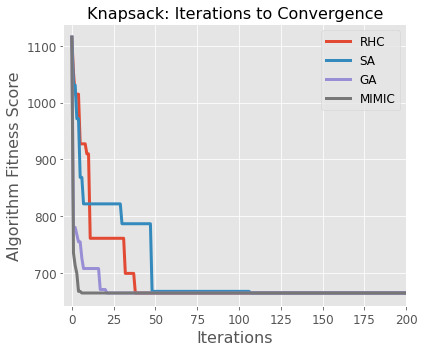

In [0]:
fig = plt.figure(figsize=(6, 5))
plt.style.use('ggplot')

# Train curve
plt.title("Knapsack: Iterations to Convergence", size = 16 )
plt.xlabel(r"Iterations", size = 16)
plt.ylabel("Algorithm Fitness Score", size = 16)
plt.xlim(-5, 200)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessRHC'], label="RHC", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessSA'], label="SA", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessGA'], label="GA", lw=3)
plt.plot(fitness_df['Iteration'], fitness_df['FitnessMIMIC'], label="MIMIC", lw=3)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()

index Algorithm Time2Converge
0 0 TimeSA 24.4
1 1 TimeRHC 280.0
2 3 TimeMIMIC 322.0
3 2 TimeGA 368.0
Out[5]:

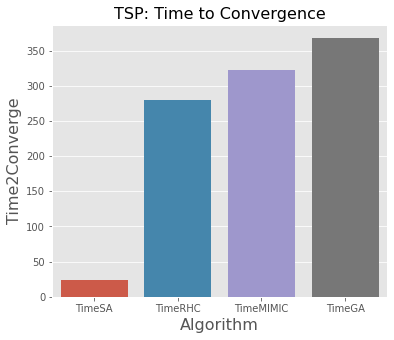

<AxesSubplot:title={'center':'TSP: Time to Convergence'}, xlabel='Algorithm', ylabel='Time2Converge'>

In [0]:
time_df = pd.DataFrame()
time_df['Algorithm'] = ['TimeSA', 'TimeRHC', 'TimeGA', 'TimeMIMIC']
time_df['Time2Converge'] = [24.4, 280, 368, 322]
tmax = time_df.sort_values('Time2Converge').reset_index()
print(tmax)

fig = plt.figure(figsize=(6, 5))
plt.style.use('ggplot')

plt.title("TSP: Time to Convergence", size = 16 )
plt.xlabel(r"Algorithm", size = 16)
plt.ylabel("Time to Converge", size = 16)
sns.barplot(tmax['Algorithm'], tmax['Time2Converge'])

# ANN Weight Optimization

In [0]:
import time

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix, precision_score
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.model_selection import validation_curve

from sklearn.neural_network import MLPClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 10000)
# Suppress scientific notation for panda data frame
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
# data source
# https://www.kaggle.com/fedesoriano/heart-failure-prediction
# UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ 
'''
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or 
   depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

'''

# load data and examine features
hf_df = pd.read_csv('/dbfs/mnt/ml/eng/georgia_tech/machine_learning/HeartFailurePredictionDataset.csv')

print(hf_df.shape)
hf_df.head()

(918, 12)
Out[4]:

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [0]:
# transorm categoric features -- OHE
cat_feats = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
hf_df_dummies = pd.get_dummies(hf_df, columns=cat_feats)

print(hf_df.shape)
print(hf_df_dummies.shape)
hf_df_dummies.head()

(918, 12)
(918, 21)
Out[5]:

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.00,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.00,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.00,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.50,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.00,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [0]:
# Heart failure data
train_hf, test_hf = train_test_split(hf_df_dummies, test_size=0.3, random_state=42, shuffle=True, stratify=hf_df['HeartDisease'])
X_train_hf = train_hf.drop(columns='HeartDisease').reset_index().drop(columns='index')
y_train_hf = train_hf['HeartDisease'].reset_index().drop(columns='index')
X_test_hf = test_hf.drop(columns='HeartDisease').reset_index().drop(columns='index')
y_test_hf = test_hf['HeartDisease'].reset_index().drop(columns='index')

print(X_train_hf.shape, X_test_hf.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_hf = scaler.fit_transform(X_train_hf)
X_test_hf = scaler.transform(X_test_hf)


(642, 20) (276, 20)

In [0]:
# heart failure Data
mlp = MLPClassifier(solver='adam',
                   hidden_layer_sizes = (200,),
                   activation='relu',
                   warm_start=True,
                   random_state=42,
                   early_stopping=True,
                   validation_fraction=0.3,
                   n_iter_no_change=50)

# fit model
mlp.fit(X_train_hf, y_train_hf)

# heart failure Data
pred_test = mlp.predict(X_test_hf)

auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")


Model Evaluation Metrics for the Test Dataset
*****************************************************
F1 Score: 0.90
Accuracy: 0.88 AUC: 0.88
Precision: 0.88 Recall: 0.92
*****************************************************

In [0]:
# Define model
nn_model_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes=[200], activation='relu',
                                          algorithm='random_hill_climb',
                                          max_iters=5000,
                                          bias=True,
                                          is_classifier=True,
                                          learning_rate=0.1,
                                          early_stopping=True,
                                          clip_max=5,
                                          max_attempts=1000,
                                          random_state=42,
                                          curve=True)
# train model
nn_model_rhc.fit(X_train_hf, y_train_hf)

Out[77]: NeuralNetwork(clip_max=5, curve=True, early_stopping=True, hidden_nodes=[200],
 max_attempts=1000, max_iters=5000, random_state=42)

In [0]:
fitness_rhc = pd.DataFrame(nn_model_rhc.fitness_curve)
# fitness_rhc.columns = ['adjFitness', 'Fitness']

print(fitness_rhc.shape)
fitness_rhc.head()

(5000, 2)
Out[78]:

,0,1
0,1.59,1.00
1,1.59,2.00
2,1.59,4.00
3,1.59,5.00
4,1.59,6.00


In [0]:
fitness_rhc.describe()

Out[79]:

,0,1
count,5000.00,5000.00
mean,0.61,3648.60
std,0.30,2087.95
min,0.33,1.00
25%,0.38,1843.50
50%,0.47,3684.00
75%,0.74,5466.50
max,1.59,7197.00


In [0]:
# heart failure Data
pred_test = nn_model_rhc.predict(X_test_hf)

auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

Model Evaluation Metrics for the Test Dataset
*****************************************************
F1 Score: 0.85
Accuracy: 0.84 AUC: 0.84
Precision: 0.87 Recall: 0.84
*****************************************************

In [0]:
nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes=[200],
                                         activation='relu',
                                         algorithm='simulated_annealing',
                                         max_iters=5000,
                                         bias=True,
                                         is_classifier=True,
                                         learning_rate=0.1,
                                         early_stopping=True,
                                         clip_max=5,
                                         max_attempts=1000,
                                         random_state=42,
                                         curve=True)

# train model
nn_model_sa.fit(X_train_hf, y_train_hf)

Out[74]: NeuralNetwork(algorithm='simulated_annealing', clip_max=5, curve=True,
 early_stopping=True, hidden_nodes=[200], max_attempts=1000,
 max_iters=5000, random_state=42)

In [0]:
# heart failure Data
pred_test = nn_model_sa.predict(X_test_hf)

auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

Model Evaluation Metrics for the Test Dataset
*****************************************************
F1 Score: 0.85
Accuracy: 0.84 AUC: 0.84
Precision: 0.88 Recall: 0.83
*****************************************************

In [0]:
fitness_sa = pd.DataFrame(nn_model_sa.fitness_curve)
# fitness_sa.columns = ['adjFitness', 'Fitness']

print(fitness_sa.shape)
fitness_sa.head()

(5000, 2)
Out[76]:

,0,1
0,1.59,3.00
1,1.59,5.00
2,1.59,7.00
3,1.59,9.00
4,1.60,11.00


In [0]:
nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes=[200],
                                         activation='relu',
                                         algorithm='genetic_alg',
                                         max_iters=5000,
                                         bias=True,
                                         is_classifier=True,
                                         learning_rate=0.1,
                                         early_stopping=True,
                                         clip_max=5,
                                         max_attempts=1000,
                                         random_state=42,
                                         curve=True)

# train model
nn_model_ga.fit(X_train_hf, y_train_hf)

Out[85]: NeuralNetwork(algorithm='genetic_alg', clip_max=5, curve=True,
 early_stopping=True, hidden_nodes=[200], max_attempts=1000,
 max_iters=5000, random_state=42)

In [0]:
# heart failure Data
pred_test = nn_model_ga.predict(X_test_hf)

auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

Model Evaluation Metrics for the Test Dataset
*****************************************************
F1 Score: 0.87
Accuracy: 0.85 AUC: 0.85
Precision: 0.84 Recall: 0.90
*****************************************************

In [0]:
fitness_ga = pd.DataFrame(nn_model_ga.fitness_curve)
# fitness_ga.columns = ['adjFitness', 'Fitness']

print(fitness_ga.shape)
fitness_ga.head()

(2182, 2)
Out[87]:

,0,1
0,5.73,403.00
1,5.73,604.00
2,5.73,805.00
3,5.73,1006.00
4,5.02,1208.00


In [0]:
nn_model_gd = mlrose_hiive.NeuralNetwork   (hidden_nodes=[200],  activation='relu', max_iters=5000,
                                           bias=True, is_classifier=True, learning_rate=0.001,
                                           early_stopping=True, clip_max=5, max_attempts=1000,
                                           random_state=42,curve=True)

# train model
nn_model_gd.fit(X_train_hf, y_train_hf)

Out[81]: NeuralNetwork(algorithm='gradient_descent', clip_max=5, curve=True,
 early_stopping=True, hidden_nodes=[200], learning_rate=0.001,
 max_attempts=1000, max_iters=5000, random_state=42)

In [0]:
# heart failure Data
pred_test = nn_model_gd.predict(X_test_hf)

auc = roc_auc_score(y_test_hf, pred_test)
f1 = f1_score(y_test_hf, pred_test)
accuracy = accuracy_score(y_test_hf, pred_test)
precision = precision_score(y_test_hf, pred_test)
recall = recall_score(y_test_hf, pred_test)

print("Model Evaluation Metrics for the Test Dataset")
print("*****************************************************")
print("F1 Score:  "+"{:.2f}".format(f1))
print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
print("*****************************************************")

Model Evaluation Metrics for the Test Dataset
*****************************************************
F1 Score: 0.85
Accuracy: 0.84 AUC: 0.84
Precision: 0.87 Recall: 0.84
*****************************************************

In [0]:
fitness_gd = pd.DataFrame(nn_model_gd.fitness_curve)
# fitness_gd.columns = ['adjFitness', 'Fitness']

print(fitness_gd.shape)
fitness_gd.head()

(5000, 1)
Out[83]:

,0
0,-1.59
1,-6.56
2,-14.86
3,-4.55
4,-1.80


In [0]:
# combine dataframes
comb_ann = pd.concat([fitness_rhc, fitness_sa], axis=1)
comb_ann = pd.concat([comb_ann, fitness_ga], axis=1) 
comb_ann = pd.concat([comb_ann, fitness_gd], axis=1)

# save data
comb_ann.to_csv('/dbfs/mnt/ml/eng/georgia_tech/machine_learning/HeartFailure-ANN-RO-Algorithms-Curves.csv')

print(comb_ann.shape)
comb_ann.head()

(5000, 7)
Out[88]:

,0,1,0,1,0,1,0
0,1.59,1.00,1.59,3.00,5.73,403.00,-1.59
1,1.59,2.00,1.59,5.00,5.73,604.00,-6.56
2,1.59,4.00,1.59,7.00,5.73,805.00,-14.86
3,1.59,5.00,1.59,9.00,5.73,1006.00,-4.55
4,1.59,6.00,1.60,11.00,5.02,1208.00,-1.80


In [0]:
wt_rhc = pd.DataFrame(nn_model_rhc.fitted_weights)
wt_sa = pd.DataFrame(nn_model_sa.fitted_weights)
wt_ga = pd.DataFrame(nn_model_ga.fitted_weights)
wt_gd = pd.DataFrame(nn_model_gd.fitted_weights)

# combine dataframes
wt_ann = pd.concat([wt_rhc, wt_sa], axis=1)
wt_ann = pd.concat([wt_ann, wt_ga], axis=1) 
wt_ann = pd.concat([wt_ann, wt_gd], axis=1)

# save data
wt_ann.to_csv('/dbfs/mnt/ml/eng/georgia_tech/machine_learning/HeartFailure-ANN-Weights.csv')

print(wt_ann.shape)
wt_ann.head()

(4400, 4)
Out[89]:

,0,0,0,0
0,-0.25,-0.35,-1.29,-0.06
1,0.90,0.90,-4.43,0.24
2,0.46,0.36,-0.24,0.15
3,0.20,0.30,-2.09,0.18
4,-0.49,-0.49,1.31,-0.68


In [0]:
comb_ann = pd.read_csv('/dbfs/mnt/ml/eng/georgia_tech/machine_learning/HeartFailure-ANN-RO-Algorithms-Curves.csv')
comb_ann = comb_ann.drop(columns=['Unnamed: 0'])
comb_ann = comb_ann[['0', '0.1', '0.2', '0.3']]
comb_ann.columns = ['RHC', 'SA', 'GA', 'GD']
comb_ann['GA'] = comb_ann['GA'].fillna(comb_ann['GA'].min())

print(comb_ann.shape)
comb_ann.head()

(5000, 4)
Out[12]:

,RHC,SA,GA,GD
0,1.594676,1.594676,5.726552,-1.594676
1,1.594676,1.593363,5.726552,-6.557518
2,1.593363,1.593607,5.726552,-14.856717
3,1.593363,1.591643,5.726552,-4.554361
4,1.593363,1.597390,5.019923,-1.799126


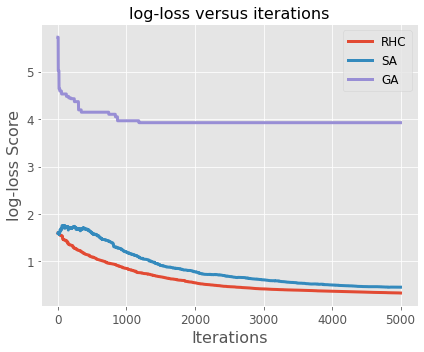

In [0]:
# loggloss during training
fig = plt.figure(figsize=(6, 5))
plt.style.use('ggplot')

# Train curve
plt.title("log-loss versus iterations", size = 16 )
plt.xlabel(r"Iterations", size = 16)
plt.ylabel("log-loss Score", size = 16)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.plot(comb_ann['RHC'], label="RHC", lw=3)
plt.plot(comb_ann['SA'], label="SA", lw=3)
plt.plot(comb_ann['GA'], label="GA", lw=3)

plt.legend(loc='best', fontsize=12)
plt.tight_layout()